In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df2 = pd.read_csv('../utils/Complete_DC_Comic_Books.csv')
df2

,Catergory_Title,Issue_Name,Issue_Link,Pencilers,Cover_Artists,Inkers,Writers,Editors,Executive_Editor,Letterers,Colourists,Rating,Release_Date,Comic_Series,Comic_Type
0,Freddy vs. Jason vs. Ash Vol 1,Freddy vs. Jason vs. Ash #1,https://dc.fandom.com/wiki/Freddy_vs._Jason_vs...,Jason Craig,"J. Scott Campbel, Alex Sinclair",NaN,James Anthony Kuhoric,"Scott Peterso, Kristy Quinn",NaN,Jared K. Fletcher,Thomas Mason,NaN,"January, 2008",A Nightmare on Elm Street Titles,Category
1,Freddy vs. Jason vs. Ash Vol 1,Freddy vs. Jason vs. Ash #2,https://dc.fandom.com/wiki/Freddy_vs._Jason_vs...,Jason Craig,Eric Powell,NaN,James Kuhoric,"Scott Peterso, Kristy Quinn",NaN,Jared K. Fletcher,Thomas Mason,NaN,NaN,A Nightmare on Elm Street Titles,Category
2,Freddy vs. Jason vs. Ash Vol 1,Freddy vs. Jason vs. Ash #3,https://dc.fandom.com/wiki/Freddy_vs._Jason_vs...,Jason Craig,Eric Powell,NaN,"James Anthony Kuhori, Kristy Quinn",Scott Peterson,NaN,Jared K. Fletcher,Thomas Mason,NaN,"February, 2008",A Nightmare on Elm Street Titles,Category
3,Freddy vs. Jason vs. Ash Vol 1,Freddy vs. Jason vs. Ash #4,https://dc.fandom.com/wiki/Freddy_vs._Jason_vs...,"Rick Burchet, Jason Craig",Eric Powell,Jason Craig,"Jeff Kat, James Anthony Kuhoric","Scott Peterso, Kristy Quinn",NaN,Jared K. Fletcher,Thomas Mason,NaN,"April, 2008",A Nightmare on Elm Street Titles,Category
4,Freddy vs. Jason vs. Ash Vol 1,Freddy vs. Jason vs. Ash #5,https://dc.fandom.com/wiki/Freddy_vs._Jason_vs...,Jason Craig,"Richard Frien, Randy Mayor",NaN,James Anthony Kuhoric,"Scott Peterso, Kristy Quinn",NaN,Jared K. Fletcher,Thomas Mason,NaN,"April, 2008",A Nightmare on Elm Street Titles,Category
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53393,Zero Girl: Full Circle Vol 1,Zero Girl: Full Circle #4,https://dc.fandom.com/wiki/Zero_Girl:_Full_Cir...,Sam Kieth,Sam Kieth,Sam Kieth,Sam Kieth,"Scott Dunbie, Kristy Quinn",Jim Lee,John Layman,Alex Sinclair,NaN,"April, 2003",Zero Girl Titles,Category
53394,Zero Girl: Full Circle Vol 1,Zero Girl: Full Circle #5,https://dc.fandom.com/wiki/Zero_Girl:_Full_Cir...,Sam Kieth,Sam Kieth,Sam Kieth,Sam Kieth,"Scott Dunbie, Kristy Quinn",Jim Lee,John Layman,Alex Sinclair,NaN,"May, 2003",Zero Girl Titles,Category
53395,Zatanna and the House of Secrets,Zatanna and the House of Secrets,https://dc.fandom.com/wiki/Zatanna_and_the_Hou...,Yoshi Yoshitani,Yoshi Yoshitani,Yoshi Yoshitani,Matthew Cody,"Alex R. Car, Diego Lopez",Michele R. Wells,Ariana Maher,Yoshi Yoshitani,Rated E for Everyone,"April, 2020",Zatanna and the House of Secrets,Stand-Alone
53396,Zatanna Special Vol 1 1,Zatanna Special Vol 1 1,https://dc.fandom.com/wiki/Zatanna_Special_Vol...,Gray Morrow,"Gray Morro, Gaspar Saladino",Gray Morrow,Gerry Conway,"Barbara Kese, Alan Gold",Dick Giordano,"Ben Od, Carrie Spiegl, John Costanza",Gray Morrow,NaN,"May, 1987",Zatanna Special Vol 1 1,Stand-Alone


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53398 entries, 0 to 53397
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Catergory_Title   53398 non-null  object
 1   Issue_Name        53398 non-null  object
 2   Issue_Link        53398 non-null  object
 3   Pencilers         50488 non-null  object
 4   Cover_Artists     50423 non-null  object
 5   Inkers            49634 non-null  object
 6   Writers           47829 non-null  object
 7   Editors           44504 non-null  object
 8   Executive_Editor  37047 non-null  object
 9   Letterers         35838 non-null  object
 10  Colourists        34160 non-null  object
 11  Rating            12009 non-null  object
 12  Release_Date      52955 non-null  object
 13  Comic_Series      53398 non-null  object
 14  Comic_Type        53398 non-null  object
dtypes: object(15)
memory usage: 6.1+ MB


In [6]:
df2.isnull().sum()

Catergory_Title         0
Issue_Name              0
Issue_Link              0
Pencilers            2910
Cover_Artists        2975
Inkers               3764
Writers              5569
Editors              8894
Executive_Editor    16351
Letterers           17560
Colourists          19238
Rating              41389
Release_Date          443
Comic_Series            0
Comic_Type              0
dtype: int64

In [7]:
# Hipótesis principal: Los cómics cuyo valor de coleccionismo es más alto comparten características comunes relacionadas con su año de publicación (más antiguos), el equipo creativo (artistas y guionistas reconocidos), el tipo de cómic (stand-alone vs serie), y su clasificación por edades (maduros o para coleccionistas).

# Preguntas derivadas: ¿El año de publicación influye en el valor del cómic?, ¿Existen autores o artistas que elevan sistemáticamente el valor de un cómic?, ¿Los cómics “stand-alone” valen más que los de una serie?, ¿La clasificación por edades indica rareza o valor para el coleccionista?

In [9]:
# Renombrar columna con error tipográfico
df2.rename(columns={"Catergory_Title": "Category_Title"}, inplace=True)

# Convertir la columna Release_Date a tipo datetime
df2["Release_Date"] = pd.to_datetime(df2["Release_Date"], format="%B, %Y", errors="coerce")

# Extraer el año como nueva columna
df2["Year"] = df2["Release_Date"].dt.year

In [11]:
# Rellenar valores nulos de tipo texto con 'Desconocido'
text_columns = [
    "Pencilers", "Cover_Artists", "Inkers", "Writers", "Editors", 
    "Executive_Editor", "Letterers", "Colourists", "Rating"
]
df2[text_columns] = df2[text_columns].fillna("Desconocido")

# Eliminar columnas irrelevantes para el análisis
df2.drop(columns=["Issue_Link"], inplace=True)

KeyError: "['Issue_Link'] not found in axis"

In [12]:
# Mostrar resumen general tras la limpieza
df2.info(), df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53398 entries, 0 to 53397
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Category_Title    53398 non-null  object        
 1   Issue_Name        53398 non-null  object        
 2   Pencilers         53398 non-null  object        
 3   Cover_Artists     53398 non-null  object        
 4   Inkers            53398 non-null  object        
 5   Writers           53398 non-null  object        
 6   Editors           53398 non-null  object        
 7   Executive_Editor  53398 non-null  object        
 8   Letterers         53398 non-null  object        
 9   Colourists        53398 non-null  object        
 10  Rating            53398 non-null  object        
 11  Release_Date      51482 non-null  datetime64[ns]
 12  Comic_Series      53398 non-null  object        
 13  Comic_Type        53398 non-null  object        
 14  Year              5148

(None,
                    Category_Title                   Issue_Name  \
 0  Freddy vs. Jason vs. Ash Vol 1  Freddy vs. Jason vs. Ash #1   
 1  Freddy vs. Jason vs. Ash Vol 1  Freddy vs. Jason vs. Ash #2   
 2  Freddy vs. Jason vs. Ash Vol 1  Freddy vs. Jason vs. Ash #3   
 3  Freddy vs. Jason vs. Ash Vol 1  Freddy vs. Jason vs. Ash #4   
 4  Freddy vs. Jason vs. Ash Vol 1  Freddy vs. Jason vs. Ash #5   
 
                    Pencilers                    Cover_Artists       Inkers  \
 0                Jason Craig  J. Scott Campbel, Alex Sinclair  Desconocido   
 1                Jason Craig                      Eric Powell  Desconocido   
 2                Jason Craig                      Eric Powell  Desconocido   
 3  Rick Burchet, Jason Craig                      Eric Powell  Jason Craig   
 4                Jason Craig       Richard Frien, Randy Mayor  Desconocido   
 
                               Writers                      Editors  \
 0               James Anthony Kuhoric  Sc

In [15]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

C:\Users\marij\AppData\Local\Temp\ipykernel_15584\2082141217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x="Year", palette="viridis")


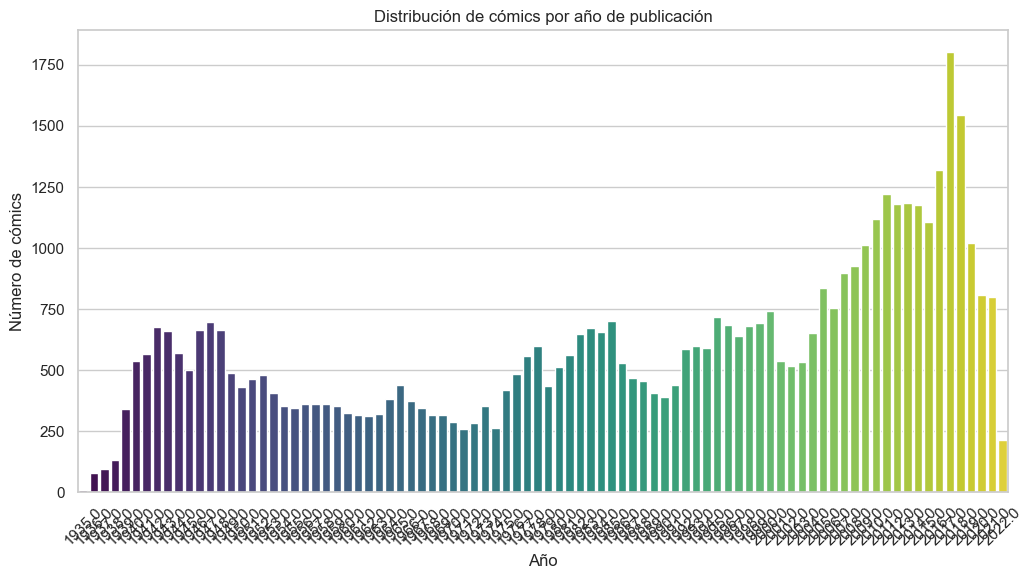

In [18]:
# 1. Distribución por año
fig1 = plt.figure()
sns.countplot(data=df2, x="Year", palette="viridis")
plt.title("Distribución de cómics por año de publicación")
plt.xlabel("Año")
plt.ylabel("Número de cómics")
plt.xticks(rotation=45);

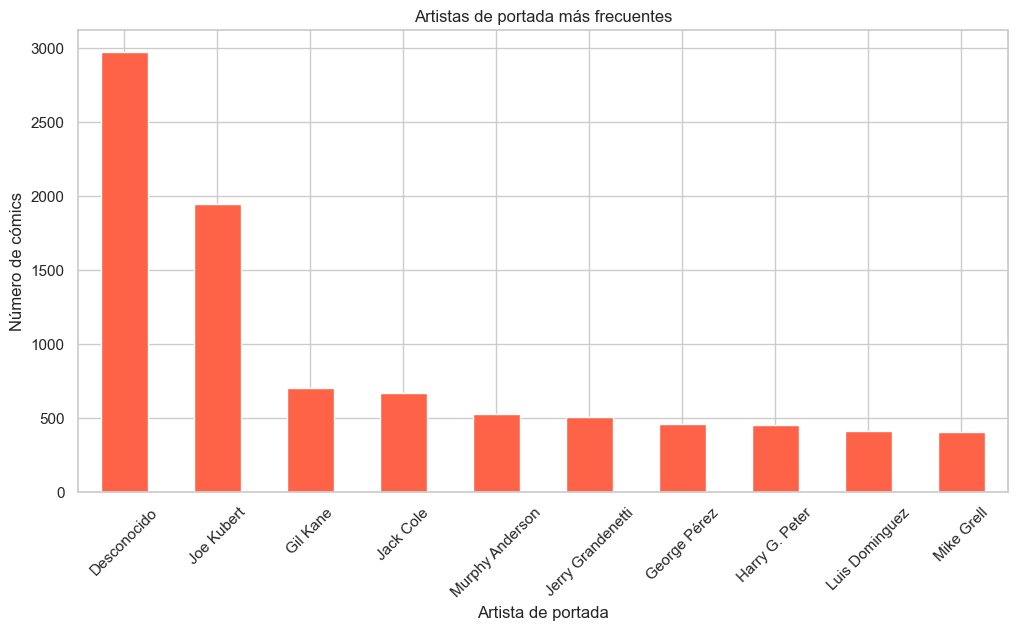

In [19]:
# 2. Frecuencia de artistas de portada
fig2 = plt.figure()
df2["Cover_Artists"].value_counts().head(10).plot(kind='bar', color='tomato')
plt.title("Artistas de portada más frecuentes")
plt.xlabel("Artista de portada")
plt.ylabel("Número de cómics")
plt.xticks(rotation=45);

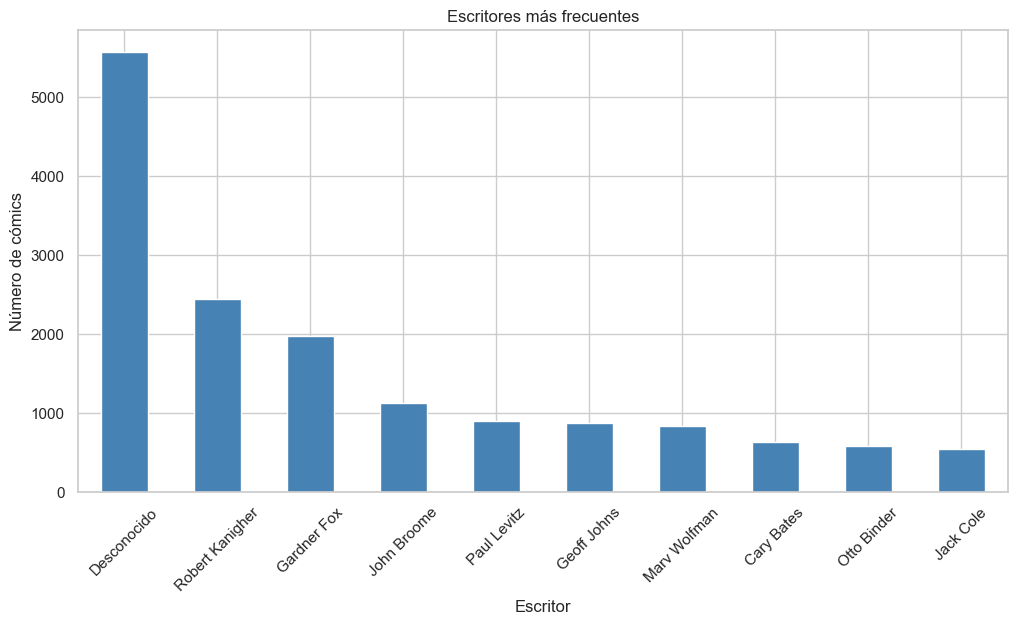

In [20]:
# 3. Frecuencia de escritores
fig3 = plt.figure()
df2["Writers"].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title("Escritores más frecuentes")
plt.xlabel("Escritor")
plt.ylabel("Número de cómics")
plt.xticks(rotation=45);

C:\Users\marij\AppData\Local\Temp\ipykernel_15584\2469216599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x="Comic_Type", palette="pastel")


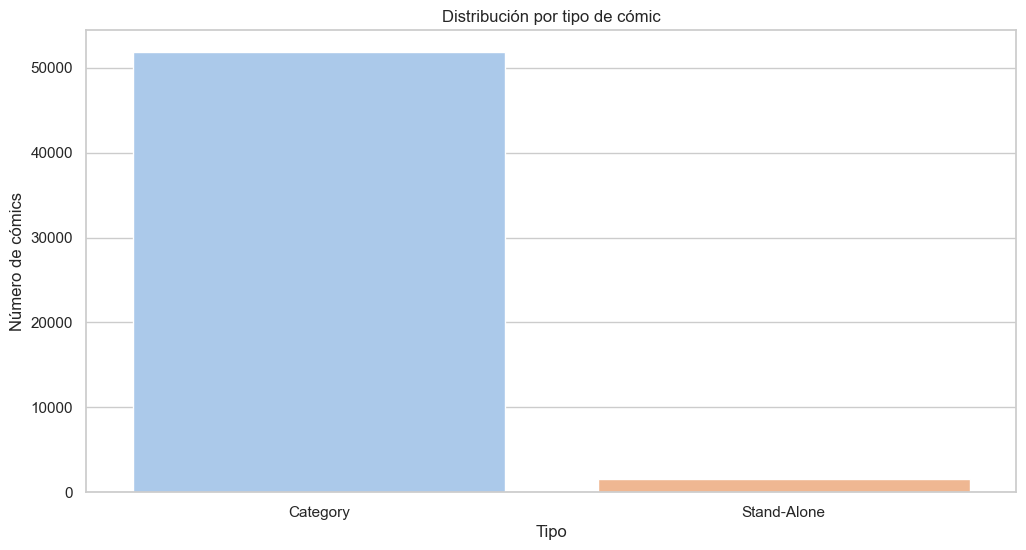

In [21]:
# 4. Distribución por tipo de cómic
fig4 = plt.figure()
sns.countplot(data=df2, x="Comic_Type", palette="pastel")
plt.title("Distribución por tipo de cómic")
plt.xlabel("Tipo")
plt.ylabel("Número de cómics");

In [26]:
top_artistas = df2["Cover_Artists"].value_counts().drop("Desconocido", errors='ignore').head(10).index
# Filtrar solo esos artistas
df_artistas = df2[df2["Cover_Artists"].isin(top_artistas)]
# Boxplot para ver la distribución del valor por artista
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_artistas, x="Cover_Artists", y="value", palette="Set2")
plt.title("Valor del cómic según artista de portada")
plt.xticks(rotation=45)
plt.ylabel("Valor del cómic")
plt.xlabel("Artista de portada")
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `value` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [27]:
df_artistas.columns

Index(['Category_Title', 'Issue_Name', 'Pencilers', 'Cover_Artists', 'Inkers',
       'Writers', 'Editors', 'Executive_Editor', 'Letterers', 'Colourists',
       'Rating', 'Release_Date', 'Comic_Series', 'Comic_Type', 'Year'],
      dtype='object')